<h1> Pre-DSI Assignment </h1> 
<p> Link to Github: <a href="url">https://github.com/AmyRouillard/Pre-DSI-Assignment-2022 <a></p>

<h1> Question 1<h1>

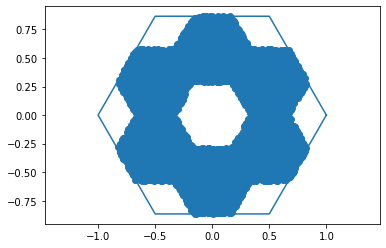

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon

#Number of iterations
N = 10000

#Number of side of the polygon (hexagon: N_gon=6)
N_gon = 6
#Verticies of polygon (eg. if N_gon is 6 shape is a hexagon)
polygon_points = [Point(np.cos(n*2*np.pi/N_gon),np.sin(n*2*np.pi/N_gon)) for n in range(N_gon)]
#Polygon
polygon = Polygon(polygon_points)

#Plot polygon
fig, ax = plt.subplots(1, 1);
x,y = polygon.exterior.xy
plt.plot(x,y);
ax.axis('equal');

#Array to store centroid of the triangle formed by a randomly selected point in the interior of the polygon
#and a random side of the polygon
p = []
for k in range(N):
    #Randomly chosen point inside the polygon
    r_point = Point(np.random.uniform(-1,1,1),np.sin(np.pi/3)*np.random.uniform(-1,1,1))
    while polygon.contains(r_point)==False:
        r_point = Point(np.random.uniform(-1,1,1),np.sin(np.pi/3)*np.random.uniform(-1,1,1))
    #Plot the random point
    #plt.scatter(r_point.x,r_point.y,color='red')
    
    #Randomly chosen vertex of the polygon
    rand_vert = np.random.randint(0, N_gon)
    #Triangle formed by a random side of the polygon (determined by the randomly selected vertex rand_vert) and r_point
    triangle = Polygon([r_point, polygon_points[rand_vert], polygon_points[(rand_vert+1)% N_gon]])
    #Plot triangle
    #x,y = triangle.exterior.xy
    #plt.plot(x,y);
    
    #Append p with the centroid of triangle
    p.append(triangle.centroid)
    #Plot centroid p[k]
    #plt.scatter(p[k].x,p[k].y);
    
xs = [point.x for point in p]
ys = [point.y for point in p]
plt.scatter(xs, ys);

Six regular hexagons of equal size emerge, packed inside the "parent" hexagon. This also occurs for other regular polygons. For example, if "N_gon" is 3, three triangles emerge. 

<h1> Question 2 <h1>

<p>Question 2.1: </p>

In [55]:
import pandas as pd

#Load data
data_akas=pd.read_csv('title.akas.tsv\data.tsv',sep='\t')
data_basics=pd.read_csv('title.basics.tsv\data.tsv',sep='\t')
data_ratings=pd.read_csv('title.ratings.tsv\data.tsv',sep='\t')

<p>Question 2.2: </p>

In [56]:
data_akas.drop_duplicates();
data_basics.drop_duplicates();
data_ratings.drop_duplicates();

<p>Question 2.3: </p>

In [57]:
#Merge ratings and basics:
#Outer join
data_merged1 = pd.merge(data_ratings, data_basics, how = "outer")

#Inner join
data_merged2 = pd.merge(data_ratings, data_basics, how = "inner")

print('After merging ratings and basics:')
print('No. of rows in "basics" + No. of rows in "ratings" - No. of rows in inner merger = ',len(data_basics.index)+len(data_ratings.index)-len(data_merged2.index))
print('No. of rows in outer merger = ',len(data_merged1.index))
print('Outer merge corresponds to the union of the data, inner merge corresponds to the intesection\n')

#Merge akas with previously merged dataframe
#Outer join
data_merged1 = pd.merge(data_akas, data_merged1, left_on = ['titleId'],right_on=['tconst'], how = "outer")

#Inner join
data_merged2 = pd.merge(data_akas, data_merged2, left_on = ['titleId'],right_on=['tconst'], how = "inner")

print('After final merger:')
print('Number of rows in outer merged dataframe = ',len(data_merged1.index))
print('Number of rows in inner merged dataframe = ',len(data_merged2.index),'\n')

print('Unique title types: ', data_merged1.titleType.unique())
print('Number of unique title types is', len(data_merged1.titleType.unique())-1, '(excluding nan)\n')

After merging ratings and basics:
No. of rows in "basics" + No. of rows in "ratings" - No. of rows in inner merger =  5330276
No. of rows in outer merger =  5330276
Outer merge corresponds to the union of the data, inner merge corresponds to the intesection

After final merger:
Number of rows in outer merged dataframe =  6740089
Number of rows in inner merged dataframe =  1686547 

Unique title types:  ['short' 'movie' nan 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort'
 'tvMiniSeries' 'tvSpecial' 'video' 'videoGame']
Number of unique title types is 10 (excluding nan)



<p>Question 2.4: </p>

In [58]:
#New data frame
df_new = data_merged1[((data_merged1.language == 'en') | (data_merged1.region == 'US')) 
                      & (data_merged1.titleType == 'movie')]

<p>Question 2.5: </p>

In [59]:
#New column added
df_new = df_new.assign(log10Votes=lambda x: np.log10(x['numVotes']))

<p>Question 2.6: </p>

In [60]:
#Genres changed to lower case
df_new['genres'] = df_new['genres'].str.lower()

<p>Question 2.6: </p>

In [61]:
#Data grouped by genres
df_grouped = df_new.groupby('genres')

print('Top ten genres sorted by mean log10Votes')
print(df_grouped['log10Votes'].mean().sort_values(ascending=False).head(10),'\n')

print('Top ten genres sorted by mean averageRating')
print(df_grouped['averageRating'].mean().sort_values(ascending=False).head(10),'\n') 

Top ten genres sorted by mean log10Votes
genres
action,fantasy,war            5.405722
action,family,romance         4.801753
animation,drama,war           4.396304
family,music,musical          4.396252
documentary,sport,thriller    4.386731
action,adventure,sci-fi       4.373261
horror,musical,sci-fi         4.340484
biography,fantasy,horror      4.271842
adventure,sci-fi,thriller     4.180897
adventure,drama,sci-fi        4.123983
Name: log10Votes, dtype: float64 

Top ten genres sorted by mean averageRating
genres
documentary,history,western        9.300000
history,sport                      9.200000
documentary,news,reality-tv        8.800000
animation,crime,documentary        8.525000
biography,history,music            8.500000
documentary,drama,thriller         8.433333
adventure,documentary,western      8.433333
comedy,mystery,sport               8.400000
action,documentary,fantasy         8.300000
biography,documentary,talk-show    8.300000
Name: averageRating, dtype: float64 

<p>Question 2.7: </p>

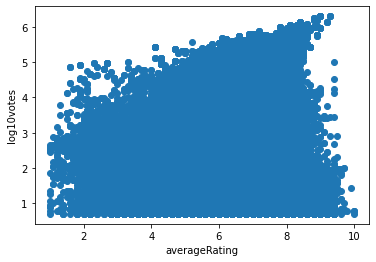

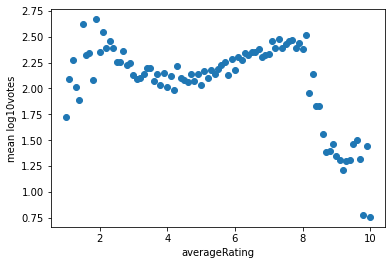

In [62]:
#Data grouped by averageRating
df_grouped2 = df_new.groupby('averageRating')

#Calculate mean of log10Votes
df_grouped2 = df_grouped2['log10Votes'].mean()

#Covert to dataframe
df_grouped2 = df_grouped2.to_frame()

#Set the index to column
df_grouped2.reset_index(inplace=True)

#Scatter plot of averageRating vs log10Votes
df_new.plot(x='averageRating', y='log10Votes', style='o',ylabel='log10votes',legend='');

#Scatter plot of averageRating vs log10Votes
df_grouped2.plot(x='averageRating', y='log10Votes', style='o',ylabel='mean log10votes',legend='');

<p>Question 2.8: </p>

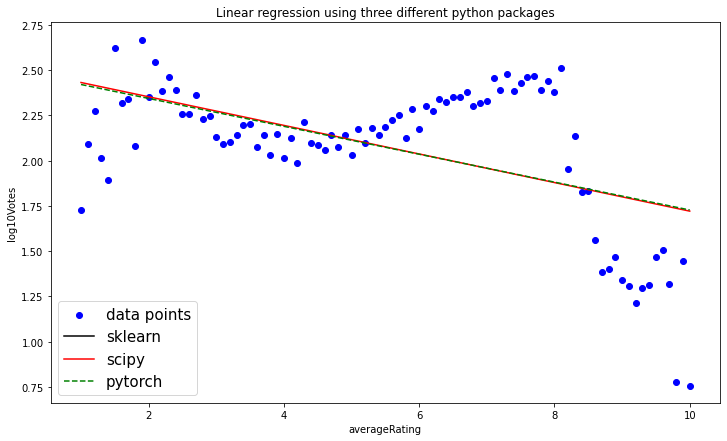

In [63]:
#New scatter plot of averageRating vs log10Votes
fig = plt.figure(figsize=(12, 7))
ax = plt.subplot(111)
x = np.array(df_grouped2['averageRating'])
y = np.array(df_grouped2['log10Votes'])
plt.scatter(x, y, color ='b',label='data points')
plt.xlabel('averageRating')
plt.ylabel('log10Votes')

#Linear regression using sklearn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Convert dataframe into two arrays 'x' and 'y' of required dimension in order to perform linear regresion
x = np.array(df_grouped2['averageRating']).reshape(-1, 1)
y = np.array(df_grouped2['log10Votes']).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

#Plot result
plt.plot(x_test, y_pred, color ='k',label='sklearn')

#Linear regression using scipy
import scipy as sp

#Convert dataframe into two arrays 'x' and 'y' of required dimension in order to perform linear regresion
x = np.array(df_grouped2['averageRating'])
y = np.array(df_grouped2['log10Votes'])
a, b, r, p, err = sp.stats.linregress(x,y)
plt.plot(x, x*a+b, color ='r',label='scipy')

#Linear regression using pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable

#Convert dataframe into two arrays 'x' and 'y' of required dimension in order to perform linear regresion
x_train = np.array(df_grouped2['averageRating']).reshape(-1, 1).astype('float32')
y_train = np.array(df_grouped2['log10Votes']).reshape(-1, 1).astype('float32')

#Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out
    
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 1500

for epoch in range(epochs):
    #Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    #Clear gradients with respect to parameters
    optimizer.zero_grad() 

    #Forward to get output
    outputs = model(inputs)

    #Calculate Loss
    loss = criterion(outputs, labels)

    #Getting gradients with respect to parameters
    loss.backward()

    #Updating parameters
    optimizer.step()

    #print('epoch {}, loss {}'.format(epoch, loss.item()))

    
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot predictions
plt.plot(x_train, predicted, '--g', label='pytorch')

#Add legend to plot
plt.title('Linear regression using three different python packages')
plt.rc('font', size=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
ax.legend(loc='lower left')
plt.show()

Scipy, sklearn and pytorch all give the same result. In the case of sklearn, if test_size is chosen to be less than 1, i.e. not all the data points are used then the result can differ. Similarly, if the learning_rate or number of epochs is changed for the pytorch method the results can differ. 

I would expect the gradient of the linear fit to be positive since, it seems reasonable to expect the average rating and the number of votes received to be positively correlated. This seems to be the case for average ratings between 4 and 8. The model might be improved be separating the data into three sections and analysing each separately. In addition, I would use some of the other data provided to categorise the data. For example, the number of ratings received for a children’s movie might be significantly less than for an adult movie. Similarly, older movies might have accumulated more votes compared to movies released less than one year ago. 